# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [72]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

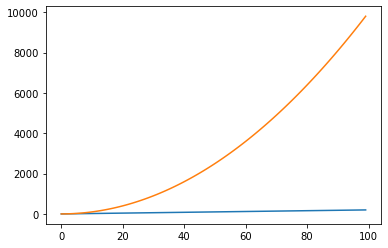

In [3]:
# Method 1

plt.plot(x,y)
plt.plot(x,z)
plt.show()


#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

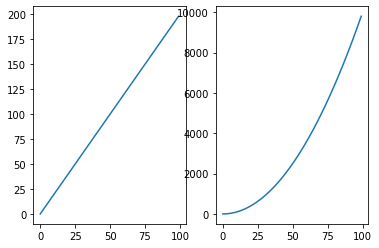

In [4]:
# Method 2

_,(char1,char2)=plt.subplots(nrows=1,ncols=2)

char1.plot(x,y)
char2.plot(x,z)
plt.show()


#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

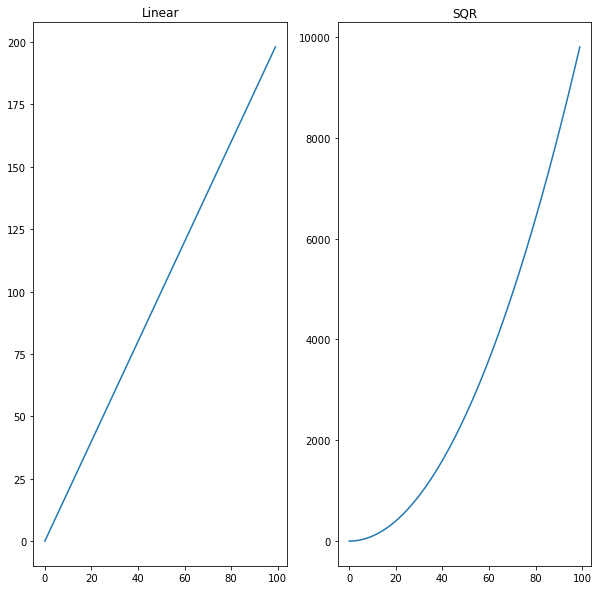

In [40]:
# your code here
_,(char1,char2)=plt.subplots(nrows=1,ncols=2,figsize=(10,10))

char1.plot(x,y)
char2.plot(x,z)
char1.set_title("Linear")
char2.set_title("SQR")
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

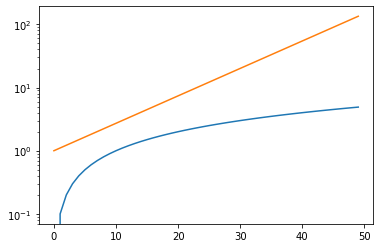

In [70]:
# your code here

x = np.arange(0,5,0.1)
y = x*2
z = np.exp(x)


plt.plot(x)
plt.plot(z)
plt.yscale('log', base=10)
plt.show()

#### As a bonus challenge, try to add a legend to the plot.

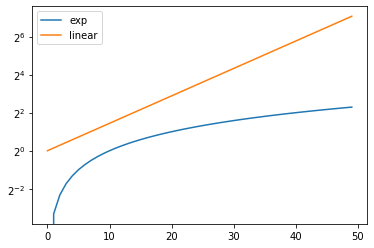

In [71]:
# your code here

x = np.arange(0,5,0.1)
y = x*2
z = np.exp(x)


plt.plot(x)
plt.plot(z)
plt.yscale('log', base=2)
plt.legend(["exp","linear"])
plt.show()

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [75]:
# your code here
data=pd.read_csv("Fitbit2.csv")


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

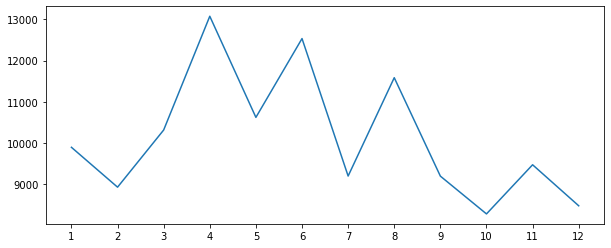

In [136]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here

dados=data.groupby("Months_encoded").agg({"Steps":"mean"})
plt.figure(figsize=(10,4))
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.plot(dados)
plt.savefig("figures")
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

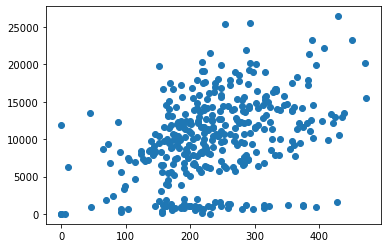

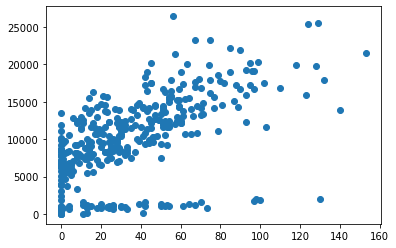

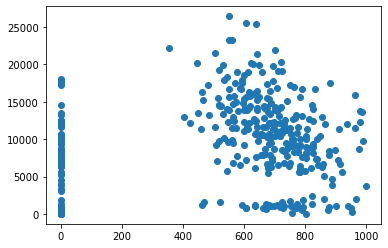

In [141]:
# your code here
columns=["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]
for element in columns:
    plt.scatter(data[element],data["Steps"])
    plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [143]:
# your code here
titanic=pd.read_csv("titanic.csv")

#### Explore the titanic dataset using Pandas dtypes.

In [144]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [153]:
# NUMERICAL VARIABLES
# your code here
numeric=titanic.select_dtypes(include="number")
numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [154]:
# CATEGORICAL VARIABLES
# your code here
categorical=titanic.select_dtypes(exclude="number")
categorical

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

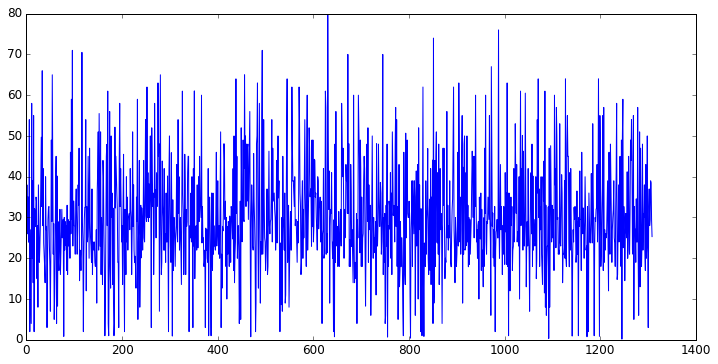

In [163]:
# your code here
plt.figure(figsize=(12,6))
plt.style.use('classic')
plt.plot(titanic["Age"])
plt.show()

#### Use the right visulalization to show the distribution of column `Age`.

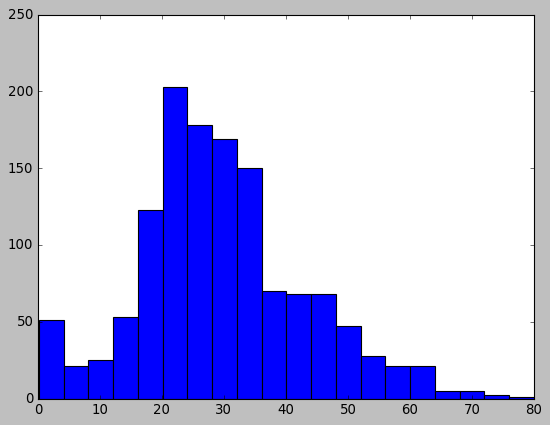

In [167]:
# your code here

plt.hist(titanic["Age"],bins=20)
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

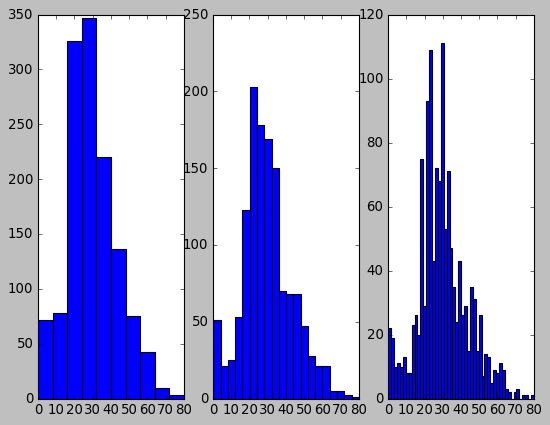

In [170]:
# your code here
_,(char1,char2,char3)=plt.subplots(nrows=1,ncols=3)
char1.hist(titanic["Age"],bins=10)
char2.hist(titanic["Age"],bins=20)
char3.hist(titanic["Age"],bins=50)
plt.show()

#### How does the bin size affect your plot?

In [171]:
"""
With more bins data is more refined and it is possible to have a better understanding of its frequency distribution
"""

'\nWith more bins data is more refined and it is possible to have a better understanding of its frequency distribution\n'

#### Use seaborn to show the distribution of column `Age`.

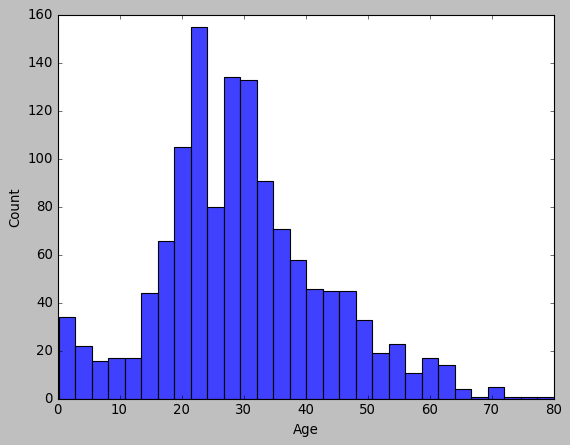

In [173]:
# your code here

import seaborn as sns

sns.histplot(data=titanic["Age"])
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

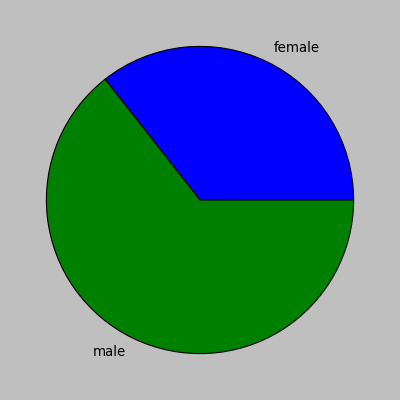

In [196]:
# Method 1 - matplotlib
# your code here

gender=titanic.groupby("Gender").agg({"PassengerId":"count"}).reset_index()
plt.pie(x=gender["PassengerId"],labels=gender["Gender"])
plt.show()

[]

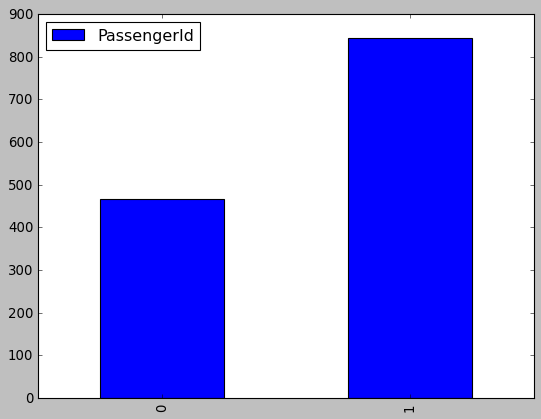

In [204]:
# Method 2 - seaborn
# your code here

gender.plot(kind="bar")
plt.plot()

#### Use the right plot to visualize the column `Pclass`.

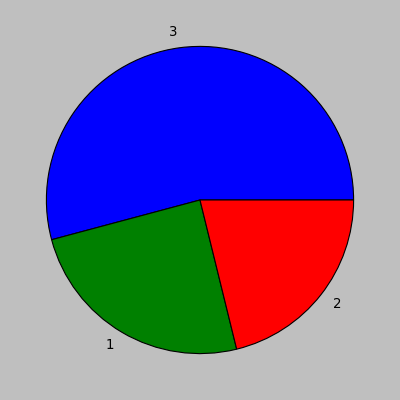

In [217]:
# your code here

plt.pie(titanic["Pclass"].value_counts(),labels=titanic["Pclass"].unique())
plt.show()


#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

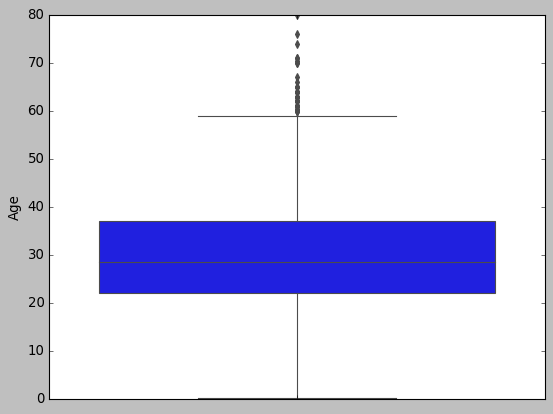

In [255]:
# your code here

sns.boxplot(y=titanic["Age"])
plt.show()


In [24]:
"""
your comments here
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [25]:
"""
Quantiles and concentration of people bye age groups
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

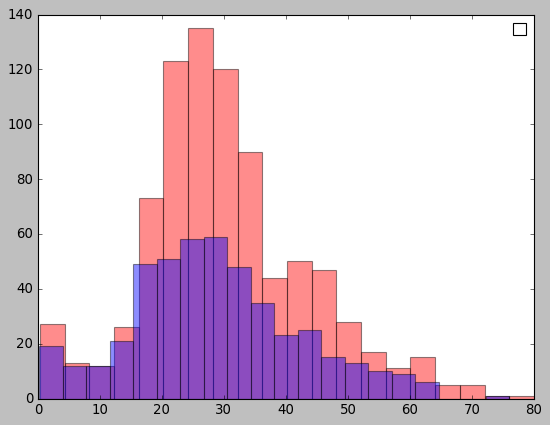

In [251]:
# your code here
male_female=titanic.groupby("Gender").agg({"PassengerId":"count"})

male=titanic["Age"][titanic["Gender"]=="male"]
female=titanic["Age"][titanic["Gender"]=="female"]
plt.legend(["male","female"])
plt.hist(male,color="red",alpha=0.45,bins=20)
plt.hist(female,color="blue",alpha=0.45,bins=20)
plt.show()

#### What additional information does the last plot provide about feature `Age`?

In [27]:
"""
Frequency Distribution
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

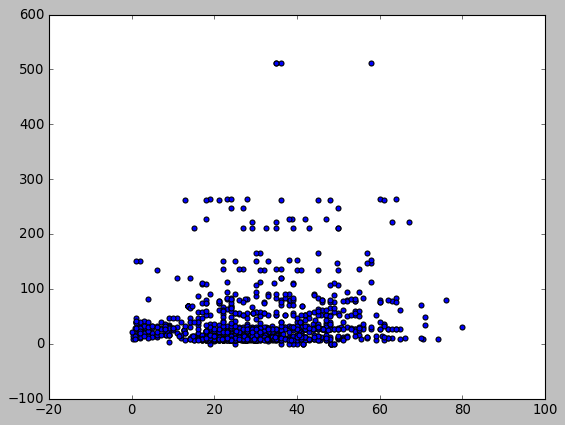

In [259]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic["Age"],titanic["Fare"])
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


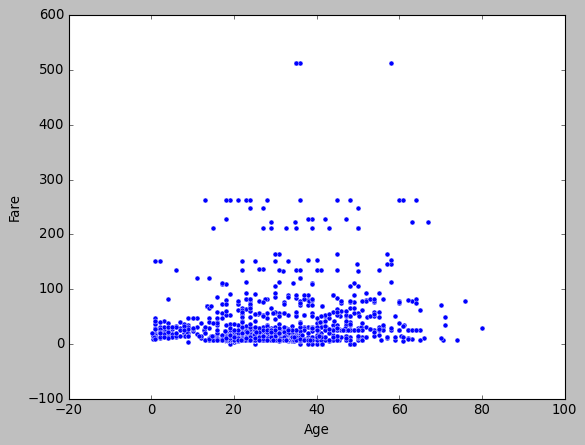

In [260]:
# Method 2 - seaborn
# your code here

sns.scatterplot(titanic["Age"],titanic["Fare"])
plt.show()


#### Plot the correlation matrix using seaborn.

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/var/folders/wf/ysxbv8152xb5ck7nz1ply8sw0000gp/T/ipykernel_37566/3752780322.py:12: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix


<AxesSubplot:>

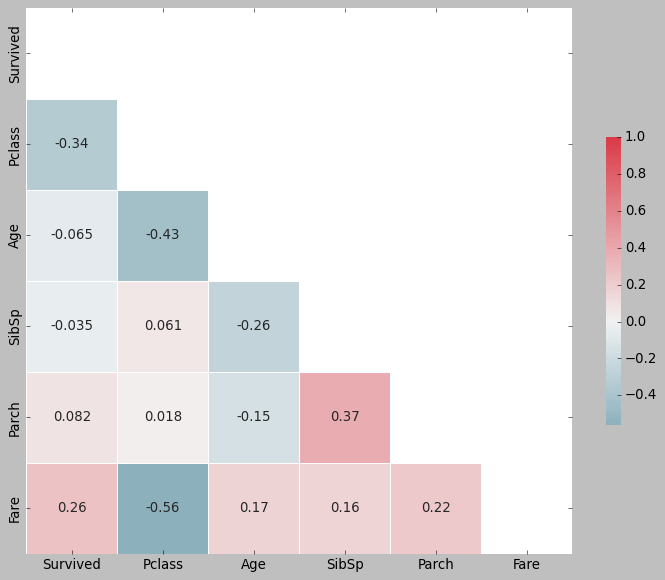

In [277]:
# your code here

only_number=titanic.select_dtypes(include="number")
only_number.drop("PassengerId",axis=1,inplace=True)

corr=only_number.corr()



f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix
# np.triu - makes an array which the upper right part of the rectangle is true and the bottom left is false  

#the colors you like
cmap = sns.diverging_palette(220, 10, as_cmap=True)

## the plot
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

#### What are the most correlated features?

In [276]:
"""
Fare vs Pclass and Pclass vs Age. Both Neg correlated.
"""


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0.0,3,22.000000,1,0,7.2500
1,1.0,1,38.000000,1,0,71.2833
2,1.0,3,26.000000,0,0,7.9250
3,1.0,1,35.000000,1,0,53.1000
4,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
1304,NaN,3,29.513190,0,0,8.0500
1305,NaN,1,39.000000,0,0,108.9000
1306,NaN,3,38.500000,0,0,7.2500
1307,NaN,3,29.513190,0,0,8.0500


#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

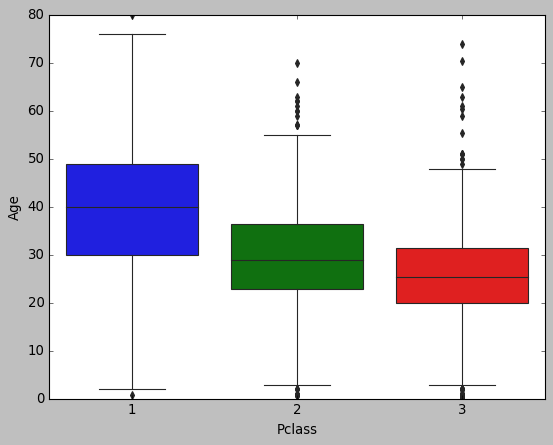

In [279]:
# your code here

sns.boxplot(x=titanic["Pclass"],y=titanic["Age"])
plt.show()

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

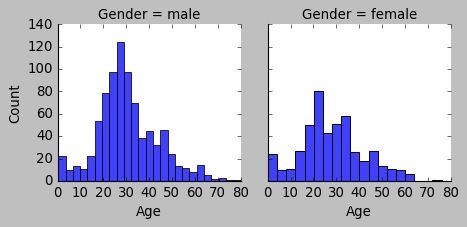

In [291]:
# your code here
g=sns.FacetGrid(titanic,col="Gender")
g.map(sns.histplot,"Age")
plt.show()